# Tutorial for timeseries prediction
This notebook is the tutorial for the timeseries prediction of 2nd order NARMA model

# Task
The task we consider here is to predict the time series $f(t)$ :

$$ f(n + 1) = 0.4f(n) + 0.4f(n)f(n-1) + 0.6u(n)3 + 0.1 $$ 

with input $u(t)$:

$$ u(t + 1) = 0.2 \sin(2\pi * 2.11t) \sin(2\pi * 3.73t) \sin(2\pi * 4.33t) $$

Here, we make echo state network to learn the model from time series data of $u(t)$ and $f(t)$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from pyres import ESN
from pyres.datasets import load_narma2
from sklearn.metrics import mean_squared_error

## load and show data

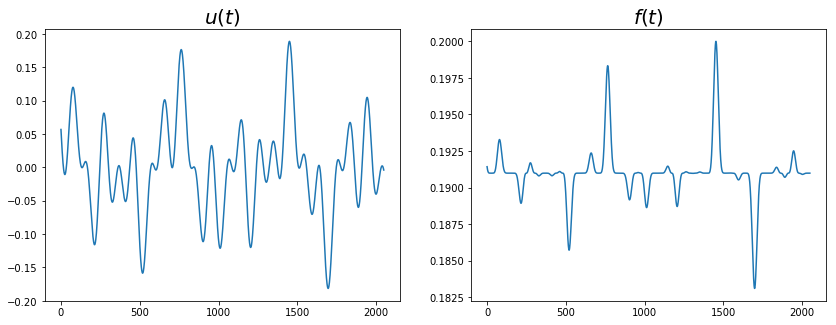

In [2]:
#loading NARMA data 
x_train, x_test, y_train, y_test = load_narma2()

#plot
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_train[0, 100:, 0])
ax1.set_title('$u(t)$', fontsize=20)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(y_train[100:,0], label='a')
ax2.set_title('$f(t)$', fontsize=20);


## Training

In [3]:
# set up parameters
N_nodes = 100
N_in = 1
washout_t  = 100 # discard intial time steps for the training
g_in = 10

y_train = y_train[washout_t:] 

# training 
esnr = ESN.ESNR(N_nodes, N_in, g_in=g_in, washout_t=washout_t)
esnr.fit(x_train, y_train);

## Prediction

normalized root mean square error (nrmse):  0.005633387670286967


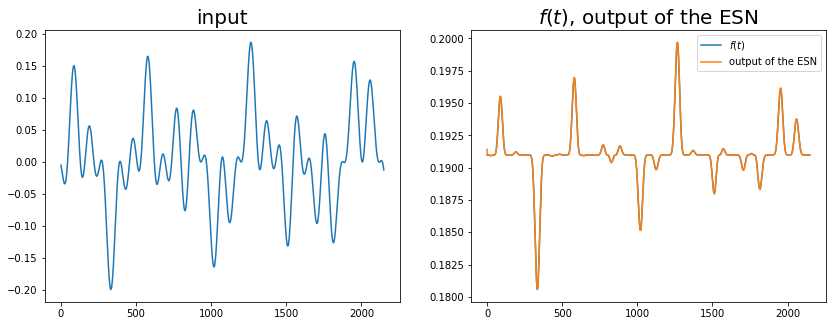

In [4]:
#prediction
esnr.washout_t=0
out = esnr.predict(x_test)

#calculate nrmase
nrmse = np.sqrt(mean_squared_error(out, y_test))/np.std(y_test)
print("normalized root mean square error (nrmse): ", nrmse)

#plot
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_test[0, :, 0])
ax1.set_title('input', fontsize=20)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(y_test[:,0], label='$f(t)$')
ax2.plot(out[:,0], label='output of the ESN')
ax2.legend(fontsize=10)
ax2.set_title('$f(t)$, output of the ESN', fontsize=20);